In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return -x*(x-2)

**Part (i):** Implement the Euler Method for this scheme. Plot the solutions for x(0) = -2, 0.5, 2 and describe their behaviour.

In [3]:
def euler(x_0, f, delta_t, n_cycles):
    x_list = [x_0]
    x = x_0
    for i in range(n_cycles):
        x = x + delta_t * f(x)
        x_list.append(x)
    return x_list

In [40]:
n_cycles = 1000
delta_t = 0.01
time_axis = np.linspace(0, n_cycles*0.1, n_cycles+1)

In [54]:
x_start = [-2, 0.5, 2, 4]
results = {}
for x0 in x_start: 
    results[x0] = euler(x_0 = x0, f = f, delta_t = delta_t, N = n_cycles)

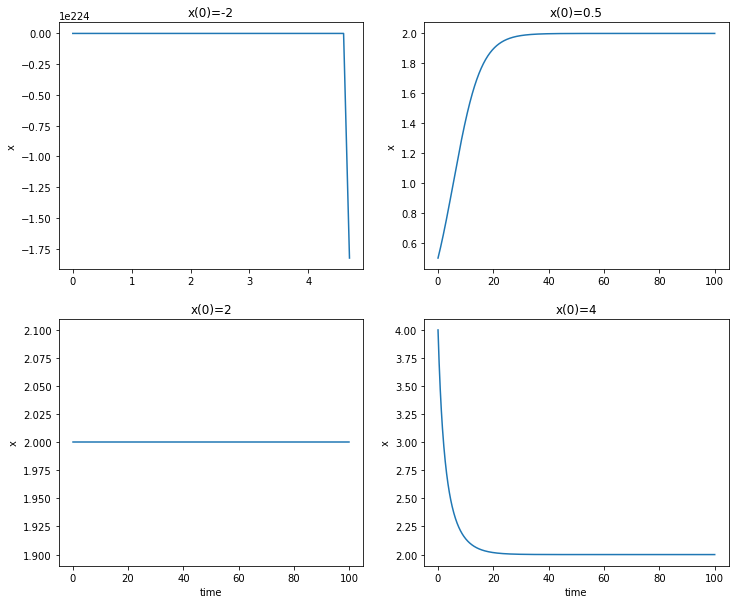

In [59]:
fig, axes = plt.subplots(2,2,figsize=(12,10))
axes[0][0].plot(time_axis, results[-2])
axes[0][0].set_title('x(0)=-2')
axes[0][0].set_ylabel('x')
axes[0][1].plot(time_axis, results[0.5])
axes[0][1].set_title('x(0)=0.5')
axes[0][1].set_ylabel('x')
axes[1][0].plot(time_axis, results[2])
axes[1][0].set_title('x(0)=2')
axes[1][0].set_ylabel('x')
axes[1][1].plot(time_axis, results[4])
axes[1][1].set_title('x(0)=4')
axes[1][1].set_ylabel('x')

axes[1][0].set_xlabel('time')
axes[1][1].set_xlabel('time')
plt.show()

In [60]:
print(results[-2][:10])
print(results[-2][-10:])

[-2, -2.08, -2.164864, -2.25502764138496, -2.3509796908467613, -2.4532703397314357, -2.5625211001241244, -2.6794366660124203, -2.8048192078043863, -2.9395856998451584]
[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]


In [62]:
print(results[0.5][:5])
print(results[0.5][-5:])

[0.5, 0.5075, 0.5150744374999999, 0.5227229094883405, 0.5304449752770678]
[1.9999999887396387, 1.9999999889648459, 1.9999999891855489, 1.9999999894018379, 1.9999999896138012]


In [63]:
print(results[2][:5])
print(results[2][-5:])

[2, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]


In [64]:
print(results[4][:5])
print(results[4][-5:])

[4, 3.92, 3.844736, 3.77381077090304, 3.706870508975263]
[2.000000001798869, 2.0000000017628916, 2.0000000017276336, 2.000000001693081, 2.000000001659219]


The intial value of x has an enormous impact on the evolution over time. 
* In the case of $x(0)=-2$ the state diverges more and more. In the beginning the temporal differences between the states are small. But the differences between two consecutive time steps increase enormously with time. After just a few time steps, the jumps are so big, that the states reach such a big negative number, that the computer represents the values as -infinity. 
* In the case of $x(0)=0.5$ the state increases and converges towards 2. (Similar for $x(0)=4$, just that it decreases and approaches 2 from above.)
* In the case of $x(0)=2$ the state doesn't change. 

**Part (ii):** Plot the function $f(x)$. What does it mean for the system if $f(x) > 0$, $f(x) < 0$ or $f(x) = 0$?

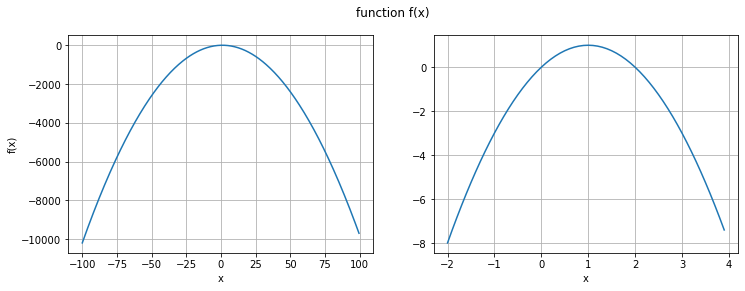

In [84]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
x_values = np.arange(-100, 100, 0.5)
axes[0].plot(x_values, [f(x) for x in x_values])
axes[0].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[0].grid()
x_values = np.arange(-2, 4, 0.1)
axes[1].plot(x_values, [f(x) for x in x_values])
axes[1].set_xlabel('x')
axes[1].grid()
plt.suptitle('function f(x)')
plt.show()

In the plots above we can see that the function $f(x)$ is concave and has its maximum at $x=1$. The values are mostly below zero. At $x=0$ and $x=2$ the function is exactly zero and between these two points its positive. 

The function $f(x)$ represents the "change" of the state. $f(x)>0$ means that the new state $x^{n+1}$ will be higher than the previous one $x^{n}$, $f(x)<0$ means that the new state $x^{n+1}$ will be lower than the previous one $x^{n}$, and $f(x)=0$ represents now change. 

Nowing this we can explain the curves from part (i):
- If we start at $x(0)=-2$, $f(x)<0$ will lead to a smaller state. Because the new $x$ is smaller than $-2$, $f(x)<0$ and the state decreases again. This whole process repeats over and over. Because the abolsute value of $f(x)$ increases with decreasing x, the changes within a single time step increase. 
- If we start at $x(0)=0.5$, $f(x)>0$ will lead to a higher state. This process continuous several times until $x$ approaches 2, where $f(x)$ gets so small, that the changes of the state almost vanish. 
- If we start at $x(0)=2$, $f(x)=0$. This means the state doesn't change. 

**Part (iii):** Find the invariant points of the dynamical system. A point $a$ is invariant if $x(t)=a$ implies that $x(t+s) = a$ for all $s>0$.

The plots of the function $f(x)$ clearly show the two invariant points of the system: $a=0$ and $a=2$ (The points where $f(x)=0$.

Even if both these points are invariant, there is a major difference between these. The point $a=2$ is attracting, i.e. if the initial point is not $2$ but in a specific neighbourhood the system will still converge towards $2$. This neighbourhood is given by the interval $I=(0,+\infty)$.

The point $a=0$ is not attracting. If the intial point is just a little bit smaller than $0$, the state will go to -infinity (as with $x(0)=-2$) and if the intial point is just a little bit bigger than $0$, the state will increase and converge to 2.


**Part (iv):** How does the dynamical system $x(t)$ behave in the long term as $t \rightarrow \infty$? Note tat this will depend on $x(0)$!

The findings from above kind of already answer the question. We have noted that
* for all initial values in the interval $I=(0,+\infty)$, the state converges to $2$, 
* if the initial state is either $x=0$ or $x=2$ the state will stay unchanged,
* for all initial states in the interval $I=(-\infty,0)$, the state will go towards $-\infty$.